In [5]:
import h5py
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!unzip "/content/gdrive/My Drive/datasets/data.h5.zip" -d "./"

Archive:  /content/gdrive/My Drive/datasets/data.h5.zip
  inflating: ./data1.h5              


# PART B TASK A

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import h5py


def loadDataH5():
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
    return trainX, trainY, valX, valY


In [20]:
def task1():

  # load data
  trainX, trainY, testX, testY = loadDataH5()

  # initialize pretrained inception model
  inceptionModel= tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

  # initalize another one with previously generated weights in part A 
  # for generating baseline accuracy before feature extraction results
  fname = "/content/gdrive/My Drive/Deeplearning/weights/weights.Inception.hdf5"
  inceptionModel_= tf.keras.applications.InceptionV3(weights=fname, input_shape=(128, 128, 3), classes = 17)

  # obtain list of predicted features and reshape
  featuresTrain= inceptionModel.predict(trainX)
  featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)

  # obtain list of predicted test features and reshape
  featuresTest= inceptionModel.predict(testX)
  featuresTest= featuresTest.reshape(featuresTest.shape[0], -1)

  # obtain baseline accuracy of inception model
  print ("predicting baseline...")
  res = inceptionModel_.predict(testX)
  res = np.argmax(res, axis=1)
  acc = np.sum(res == testY) / len(testX)
  print ("Baseline accuracy is:",acc)
  print()

  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn import metrics
  
  # initialize models
  randomforest = RandomForestClassifier(200)
  # adaboost = AdaBoostClassifier()
  decisiontree = DecisionTreeClassifier()
  knn = KNeighborsClassifier()
  svm = SVC(gamma='auto')

  # fit models
  randomforest.fit(featuresTrain, trainY)
  # adaboost.fit(featuresTrain, trainY)
  decisiontree.fit(featuresTrain, trainY)
  knn.fit(featuresTrain, trainY)
  svm.fit(featuresTrain, trainY)

  # evaluate the models
  randomforest_res = randomforest.predict(featuresTest)
  # adaboost_res = adaboost.predict(featuresTest)
  decisiontree_res = decisiontree.predict(featuresTest)
  knn_res = knn.predict(featuresTest)
  svm_res = svm.predict(featuresTest)

  # print results
  print ("Random forest accuracy is:",metrics.accuracy_score(randomforest_res, testY))
  # print ("Adaboost accuracy is:",metrics.accuracy_score(adaboost_res, testY))
  print ("Decision tree accuracy is:",metrics.accuracy_score(decisiontree_res, testY))
  print ("K-nearest neighbors accuracy is:",metrics.accuracy_score(knn_res, testY))
  print ("SVM accuracy is:",metrics.accuracy_score(svm_res, testY))

task1()

predicting baseline...
Baseline accuracy is: 0.8

Random forest accuracy is: 0.788235294117647
Adaboost accuracy is: 0.13823529411764707
Decision tree accuracy is: 0.4588235294117647
K-nearest neighbors accuracy is: 0.6411764705882353
SVM accuracy is: 0.8088235294117647


# PART B TASK B

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 17)                4369      
Total params: 16,816,465
Trainable params: 2,101,777
Non-trainable params: 14,714,688
_________________________________________________________________
None
Epoch 1/20
1020/1020 [==============================] - 8s 8ms/step - loss: 2.1169 - accuracy: 

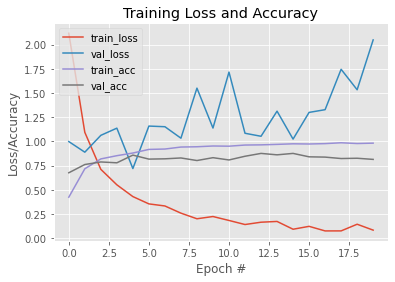

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

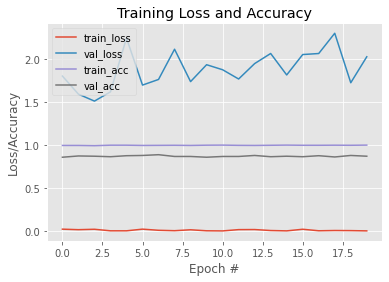

Epoch 1/20
1020/1020 [==============================] - 22s 22ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 2.0017 - val_accuracy: 0.8647
Epoch 2/20
1020/1020 [==============================] - 22s 21ms/step - loss: 1.7810e-07 - accuracy: 1.0000 - val_loss: 1.8840 - val_accuracy: 0.8706
Epoch 3/20
1020/1020 [==============================] - 22s 22ms/step - loss: 1.1647e-04 - accuracy: 1.0000 - val_loss: 2.0337 - val_accuracy: 0.8765
Epoch 4/20
1020/1020 [==============================] - 22s 21ms/step - loss: 3.5200e-07 - accuracy: 1.0000 - val_loss: 2.2010 - val_accuracy: 0.8824
Epoch 5/20
1020/1020 [==============================] - 22s 21ms/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 2.0170 - val_accuracy: 0.8676
Epoch 6/20
1020/1020 [==============================] - 22s 21ms/step - loss: 6.0070e-04 - accuracy: 1.0000 - val_loss: 1.8563 - val_accuracy: 0.8794
Epoch 7/20
1020/1020 [==============================] - 22s 21ms/step - loss: 7.1408e-08 - accuracy: 1.0000 

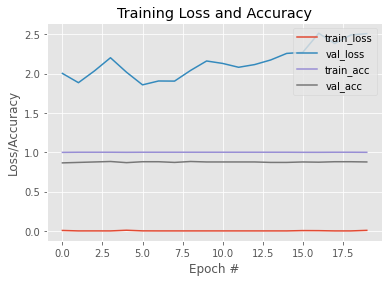

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 17)                4369      
Total params: 16,816,465
Trainable params: 15,080,977
Non-trainable params: 1,735,488
_________________________________________________________________
None
Epoch 1/20
128/127 [==============================] - 19s 146ms/step - loss: 2.1751 - accuracy:

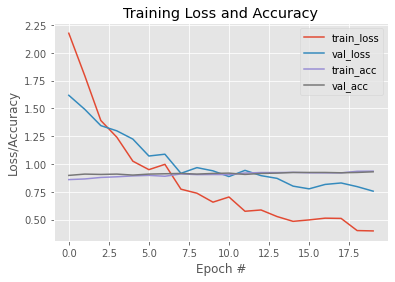

In [12]:
def showGraph(NUM_EPOCHS,H):
  # plot the training loss and accuracy
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()


def task2():
  NUM_EPOCHS = 20
  trainX, trainY, testX, testY = loadDataH5()
  opt = tf.keras.optimizers.RMSprop(lr=0.001)

  #============================================
  # train with Inception model layers disabled
  #============================================
  vgg= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

  vgg.trainable= False
  model = tf.keras.models.Sequential()
  model.add(vgg)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(256, activation='relu')) 
  model.add(tf.keras.layers.Dense(17, activation='softmax'))
  
  print (model.summary())

  model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

  H = model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=1,epochs=NUM_EPOCHS)
  print ("Test Data Loss and Accuracy: ", model.evaluate(testX, testY))

  print ("ALL LAYERS FROZEN")
  showGraph(NUM_EPOCHS, H)

  #=========================
  # unfreeze block5 onwards
  #=========================
  print (vgg.summary())
  opt = tf.keras.optimizers.RMSprop(lr=1e-5)
  vgg.trainable= True
  trainableFlag= False

  for layer in vgg.layers:
    if layer.name == 'block5_conv1':
      trainableFlag= True
    layer.trainable= trainableFlag

  model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
  H = model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=1,epochs=NUM_EPOCHS)
  print ("Test Data Loss and Accuracy: ", model.evaluate(testX, testY))

  print ("BLOCKS 5 UNFROZEN")
  showGraph(NUM_EPOCHS, H)

  #=========================
  # unfreeze block4 onwards
  #=========================
  trainableFlag= False
  opt = tf.keras.optimizers.RMSprop(lr=1e-6)

  for layer in vgg.layers:
    if layer.name == 'block4_conv1':
      trainableFlag= True
    layer.trainable= trainableFlag

  model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
  H = model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=1,epochs=NUM_EPOCHS)
  print ("Test Data Loss and Accuracy: ", model.evaluate(testX, testY))

  print ("BLOCKS 4 UNFROZEN")
  showGraph(NUM_EPOCHS, H)

  #============================
  # run with data augmentation
  #============================
  aug= tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=20, width_shift_range=0.1, shear_range=0.2, zoom_range=0.4, horizontal_flip=True)
  trainGenerator= aug.flow(trainX, trainY, batch_size=32)

  model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
  print (model.summary())
  H = model.fit(trainGenerator,validation_data=(testX,testY),batch_size=1,epochs=NUM_EPOCHS, steps_per_epoch= len(trainX)/ 8)
  print ("Test Data Loss and Accuracy: ", model.evaluate(testX, testY))

  print ("BLOCKS 4 UNFROZEN WITH DATA AUGMENTATION")
  showGraph(NUM_EPOCHS, H)

task2()